<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Augmentation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

!pip install tensorflow-addons
import tensorflow_addons as tfa

import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14418939595564913066
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15240134656
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7162902423061356670
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

import sys
import os
from google.colab import files

!wget https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/visualization.py

from visualization import DataVisualization, ModelVisualization, draw_dataframe

--2023-09-26 06:26:11--  https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8935 (8.7K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]   8.73K  --.-KB/s    in 0s      

2023-09-26 06:26:12 (133 MB/s) - ‘visualization.py’ saved [8935/8935]



# Данные

## Загрузка датасета

In [4]:
!pip install yadisk
import yadisk
y = yadisk.YaDisk()
y.download_by_link("https://disk.yandex.ru/d/SqM9S_cG9oVlww", "dataset-loz2.zip")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.8 MB/s eta 0:00:00


In [5]:
url_clear = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/clear.zip'
url_G = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/G.zip'
url_GP = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/GP.zip'
url_M = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/M.zip'
url_T = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/T.zip'

In [6]:
!mkdir dataset
%cd dataset

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/clear.zip
!unzip clear.zip
!rm clear.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/G.zip
!unzip G.zip
!rm G.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/GP.zip
!unzip GP.zip
!rm GP.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/M.zip
!unzip M.zip
!rm M.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/T.zip
!unzip T.zip
!rm T.zip

!ls
%cd ..

/content/dataset
--2023-09-26 06:26:17--  https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/clear.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/my_dataset/clear.zip [following]
--2023-09-26 06:26:17--  https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/my_dataset/clear.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20822596 (20M) [application/zip]
Saving to: ‘clear.zip’

clear.zip           100%[===================>]  19.86M  --.-KB/s    in 0.06s   

2023-09-26 06:26:18 (334 MB/s) - ‘clear.zip’ save

## Формирование датасета

In [7]:
img_init_shape = (1704, 2272)

In [8]:
import cv2

def read_dataset(name):
    im_list = []
    for f in os.listdir('dataset/' + name):
        im = cv2.imread('dataset/' + name + '/' + f)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        #print(im.shape)
        im_list.append(im.reshape(-1))
    dataset_type = np.array(im_list)
    return dataset_type

In [9]:
dataset_clear = read_dataset('clear')
print(dataset_clear.shape)

(28, 11614464)


In [10]:
dataset_G = read_dataset('G')
print(dataset_G.shape)

(38, 11614464)


In [11]:
dataset_GP = read_dataset('GP')
print(dataset_GP.shape)

(38, 11614464)


In [12]:
dataset_M = read_dataset('M')
print(dataset_M.shape)

(23, 11614464)


In [13]:
dataset_T = read_dataset('T')
print(dataset_T.shape)

(38, 11614464)


In [14]:
label_names = ['clear', 'G', 'GP', 'M', 'T']
dataset = np.concatenate((dataset_clear, dataset_G, dataset_GP, dataset_M, dataset_T), axis=0)
labels = np.array([0] * dataset_clear.shape[0] + [1] * dataset_G.shape[0] + [2] * dataset_GP.shape[0] +
         [3] * dataset_M.shape[0] + [4] * dataset_T.shape[0])

In [15]:
def form_test_batch(dataset, labels):
    sample_size = int(0.2 * dataset.shape[0])
    indexes = np.random.choice(dataset.shape[0], sample_size, replace=False)

    x=np.array([i for i in range(dataset.shape[0])])
    mask=np.full(dataset.shape[0], True, dtype=bool)
    mask[indexes]=False

    print(dataset[mask].shape, labels[mask].shape, dataset[~mask].shape, labels[~mask].shape)
    return dataset[mask], labels[mask], dataset[~mask], labels[~mask]

In [16]:
train_dataset_clear, train_labels_clear, test_dataset_clear, test_labels_clear = form_test_batch(
    dataset_clear, np.array([0] * dataset_clear.shape[0]))

train_dataset_G, train_labels_G, test_dataset_G, test_labels_G = form_test_batch(
    dataset_G, np.array([1] * dataset_G.shape[0]))

train_dataset_GP, train_labels_GP, test_dataset_GP, test_labels_GP = form_test_batch(
    dataset_GP, np.array([2] * dataset_GP.shape[0]))

train_dataset_M, train_labels_M, test_dataset_M, test_labels_M = form_test_batch(
    dataset_M, np.array([3] * dataset_M.shape[0]))

train_dataset_T, train_labels_T, test_dataset_T, test_labels_T = form_test_batch(
    dataset_T, np.array([4] * dataset_T.shape[0]))

(23, 11614464) (23,) (5, 11614464) (5,)
(31, 11614464) (31,) (7, 11614464) (7,)
(31, 11614464) (31,) (7, 11614464) (7,)
(19, 11614464) (19,) (4, 11614464) (4,)
(31, 11614464) (31,) (7, 11614464) (7,)


In [17]:
print(train_dataset_clear.shape, train_dataset_G.shape, train_dataset_GP.shape,
      train_dataset_M.shape, train_dataset_T.shape)

(23, 11614464) (31, 11614464) (31, 11614464) (19, 11614464) (31, 11614464)


In [18]:
data = DataVisualization(label_names,
                         np.concatenate((train_dataset_clear, train_dataset_G, train_dataset_GP,
                                         train_dataset_M, train_dataset_T), axis=0),
                         np.concatenate((train_labels_clear, train_labels_G, train_labels_GP,
                                         train_labels_M, train_labels_T), axis=0),
                         np.concatenate((test_dataset_clear, test_dataset_G, test_dataset_GP,
                                         test_dataset_M, test_dataset_T), axis=0),
                         np.concatenate((test_labels_clear, test_labels_G, test_labels_GP,
                                         test_labels_M, test_labels_T), axis=0),
                         image_shape=img_init_shape)

In [19]:
data.shuffle_data()
data.make_val()
data.make_data()

## Описание датасета

In [20]:
data.make_data_stat()

In [21]:
data.size_data_analysis()

,name,size,std
0,train,108,4.176123
1,val,27,1.743560
2,test,30,1.264911


In [22]:
data.class_data_analysis()

,name,clear,G,GP,M,T
0,train,19,23,24,15,27
1,val,4,8,7,4,4
2,test,5,7,7,4,7


# Нейросеть

In [23]:
img_chopped_shape = (300, 300)

In [24]:
model = tf.keras.applications.MobileNet(
    input_shape=(img_chopped_shape[0], img_chopped_shape[1], 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=5,
    classifier_activation="softmax"
)

In [25]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "mobilenet_1.00_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 150, 150, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 150, 150, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 150, 150, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 150, 150, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 150, 150, 32

# Аугментация

In [27]:
def image_chopped_format(image_data):
    return (np.transpose(image_data.reshape(3, img_chopped_shape[1], img_chopped_shape[0], order='F'), axes=[2,1,0]))

In [28]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(3, img_init_shape[1], img_init_shape[0], order='F'), axes=[2,1,0]))

## Chop

In [37]:
def chop(data, labels):
    res = np.zeros((0, img_chopped_shape[0] * img_chopped_shape[1] * 3))
    for left_corner in range(100, img_init_shape[0] - img_chopped_shape[0], 2 * img_chopped_shape[0]):
        for top_corner in range(100, img_init_shape[1] - img_chopped_shape[1], 2 * img_chopped_shape[1]):
            res = np.concatenate((res,
                                 tf.image.crop_to_bounding_box(
                                      data, left_corner, top_corner,
                                      img_chopped_shape[0], img_chopped_shape[1]).numpy().reshape(data.shape[0], -1)),
                                 axis=0)
    #for left_corner in range(img_init_shape[0] - img_chopped_shape[0] - 101, -1, -img_chopped_shape[0]):
    #    for top_corner in range(img_init_shape[1] - img_chopped_shape[1] - 101, -1, -img_chopped_shape[1]):
    #        res = np.concatenate((res,
    #                             tf.image.crop_to_bounding_box(
    #                                  data, left_corner, top_corner,
    #                                  img_chopped_shape[0], img_chopped_shape[1]).numpy().reshape(data.shape[0], -1)),
    #                             axis=0)
    return res, np.tile(labels,
                        int(np.floor((img_init_shape[0]-img_chopped_shape[0]-100) / (2 * img_chopped_shape[0])) *
                        np.floor((img_init_shape[1]-img_chopped_shape[1]-100) / (2 * img_chopped_shape[1]))) * 2)

In [30]:
x_image_train = np.zeros((0, img_init_shape[0], img_init_shape[1], 3))
for id in range(data.x_train.shape[0]):
    x_image_train = np.concatenate((x_image_train, image_format(data.x_train[id]).reshape(1, img_init_shape[0], img_init_shape[1], 3)), axis=0)

In [31]:
x_image_test = np.zeros((0, img_init_shape[0], img_init_shape[1], 3))
for id in range(data.x_test.shape[0]):
    x_image_test = np.concatenate((x_image_test, image_format(data.x_test[id]).reshape(1, img_init_shape[0], img_init_shape[1], 3)), axis=0)

In [38]:
chopped_x_train, chopped_y_train = chop(x_image_train, data.y_train)

In [39]:
chopped_x_test, chopped_y_test = chop(x_image_test, data.y_test)

In [40]:
chopped_data = DataVisualization(label_names,
                         chopped_x_train, chopped_y_train,
                         chopped_x_test, chopped_y_test,
                         image_shape=img_chopped_shape)

In [41]:
print(chopped_data.x_train.shape, chopped_data.y_train.shape, chopped_data.x_test.shape, chopped_data.y_test.shape)

(1296, 270000) (1296,) (360, 270000) (360,)


In [42]:
chopped_data.shuffle_data()
chopped_data.make_val()
chopped_data.make_data()

In [43]:
chopped_data.make_data_stat()

In [44]:
chopped_data.size_data_analysis()

,name,size,std
0,train,1037,38.866953
1,val,259,12.023311
2,test,360,15.178933


In [45]:
chopped_data.class_data_analysis()

,name,clear,G,GP,M,T
0,train,188,219,224,145,261
1,val,40,57,64,35,63
2,test,60,84,84,48,84


## Rotate

In [46]:
im = chopped_data.x_train[6]

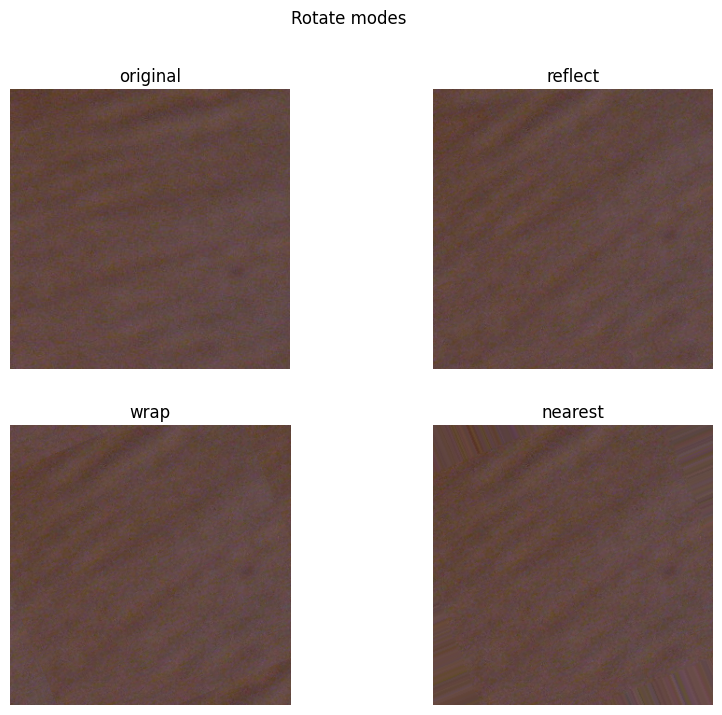

In [53]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_chopped_format(im) / 255)
plt.title("original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(tfa.image.rotate(image_chopped_format(im), angles=tf.constant(np.pi/8), fill_mode='reflect').numpy() / 255)
plt.title("reflect")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(tfa.image.rotate(image_chopped_format(im), angles=tf.constant(np.pi/8), fill_mode='wrap').numpy() / 255)
plt.title("wrap")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(tfa.image.rotate(image_chopped_format(im), angles=tf.constant(np.pi/8), fill_mode='nearest').numpy() / 255)
plt.title("nearest")
plt.axis('off')

_ = plt.suptitle("Rotate modes")

In [54]:
def rotate_n_times(data, labels, n):
    result_data = np.array(data)
    for i in range(1, n):
        result_data = np.concatenate((result_data, tfa.image.rotate(data, angles=tf.constant(2*np.pi/n), fill_mode='reflect').numpy()), axis=0)
    return result_data, np.tile(labels, n)

In [ ]:
rotation_results = pd.DataFrame(columns=['num of rotations', 'loss', 'accuracy'])
epochs_num = 15
epoch_range = range(epochs_num)
for num_of_rotations in np.arange(1, 2):
    print(num_of_rotations)
    new_rotated_data, new_rotated_labels =  rotate_n_times(chopped_data.x_train, chopped_data.y_train, num_of_rotations)
    #new_rotated_data = DataVisualization(label_names, new_rotated_data, new_rotated_labels,
    #                                     np.zeros((0, img_init_shape[0]*img_init_shape[1]*3)), np.zeros((0, )))
    new_data = DataVisualization(label_names, new_rotated_data, new_rotated_labels,
                                         chopped_data.x_train, chopped_data.y_train, image_shape=img_chopped_shape)
    new_data.make_val()
    new_data.make_data()
    #print(new_data.x_train.shape, new_data.y_train.shape, new_data.x_val.shape, new_data.y_val.shape, new_data.x_test.shape, new_data.y_test.shape)
    model_work = ModelVisualization(model, new_data)
    model_work.model_fit(epochs_num)
    # model_work.draw_model_plot()
    loss, accuracy = model_work.model.evaluate(model_work.data.x_image_test, model_work.data.y_vect_test)

    history = model_work.get_history()

    fig, ax = plt.subplots(figsize=(15, 60))

    plt.subplot(10, 2, 2*num_of_rotations - 1)
    plt.plot(epoch_range, history['accuracy'], label='Training accuracy')
    plt.plot(epoch_range, history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(10, 2, 2*num_of_rotations)
    plt.plot(epoch_range, history['loss'], label='Training loss')
    plt.plot(epoch_range, history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    new_row = {'num of rotations':num_of_rotations, 'loss':loss, 'accuracy':accuracy}
    # saturation_results.append(new_row, ignore_index=True)
    saturation_results = pd.concat([saturation_results, pd.DataFrame.from_records([new_row])], ignore_index=True)
plt.show()

1


In [ ]:
draw_dataframe(saturation_results, 'results by angel of rotation')